**downloading the emotional-speech-set**

In [3]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 423M/428M [00:05<00:00, 30.2MB/s]
100% 428M/428M [00:05<00:00, 83.2MB/s]


**Unzipping the emotional-speech-set and storing in a new folder named dataset**

In [4]:
!unzip /content/toronto-emotional-speech-set-tess.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: dataset/TESS Toronto emotion

 **importing neccessary libraries**

In [43]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio



**Function for extracting features from audio**

In [6]:
def extract_audio_features(audio_file):
    # Use librosa to load the audio file
    audio, sr= librosa.load(audio_file)
    # Extract MFCC features
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T,axis=0)
    # Normalize MFCCs
    mfccs = (mfccs - np.mean(mfccs)) / np.std(mfccs)

    return mfccs



**Function for Loading data from a directory**

In [11]:
def load_audio_data(data_dir):
    audio_data = []
    transcripts=[]
    paths=[]
    for dirname, _, filenames in os.walk(data_dir):
      for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        features=extract_audio_features(os.path.join(dirname, filename))
        audio_data.append(features)
        # Load corresponding transcript
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        transcripts.append(label)
    return audio_data,transcripts,paths


In [12]:
# Load audio data from folder
data_dir="/content/dataset/TESS Toronto emotional speech set data/"
audio_data,transcripts,paths= load_audio_data(data_dir)



**Creating a dataframe with paths and transcripts**

In [44]:
df=pd.DataFrame()
df['audio']=np.array(paths)
df['label']=np.array(transcripts)

In [45]:
df

,audio,label
0,/content/dataset/TESS Toronto emotional speech...,neutral
1,/content/dataset/TESS Toronto emotional speech...,neutral
2,/content/dataset/TESS Toronto emotional speech...,neutral
3,/content/dataset/TESS Toronto emotional speech...,neutral
4,/content/dataset/TESS Toronto emotional speech...,neutral
...,...,...
2795,/content/dataset/TESS Toronto emotional speech...,ps
2796,/content/dataset/TESS Toronto emotional speech...,ps
2797,/content/dataset/TESS Toronto emotional speech...,ps
2798,/content/dataset/TESS Toronto emotional speech...,ps


**Exploratory analysis**

In [47]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

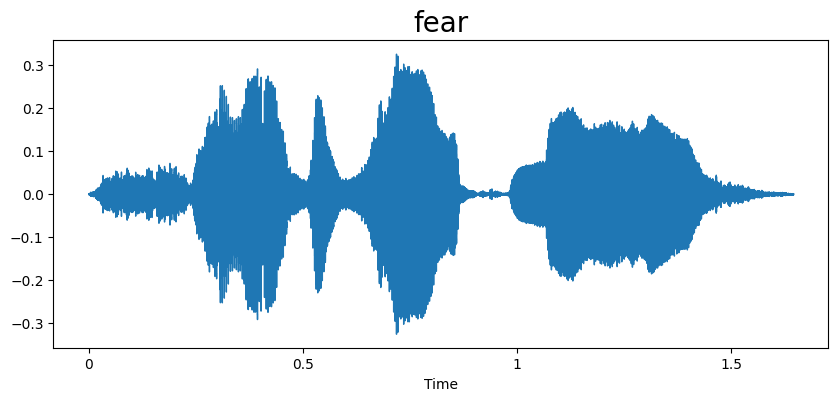

In [48]:
emotion = 'fear'
path = np.array(df['audio'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

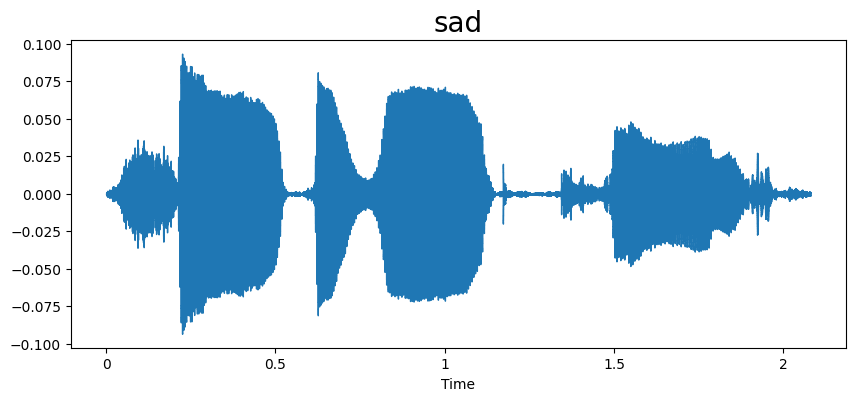

In [49]:
emotion = 'sad'
path = np.array(df['audio'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

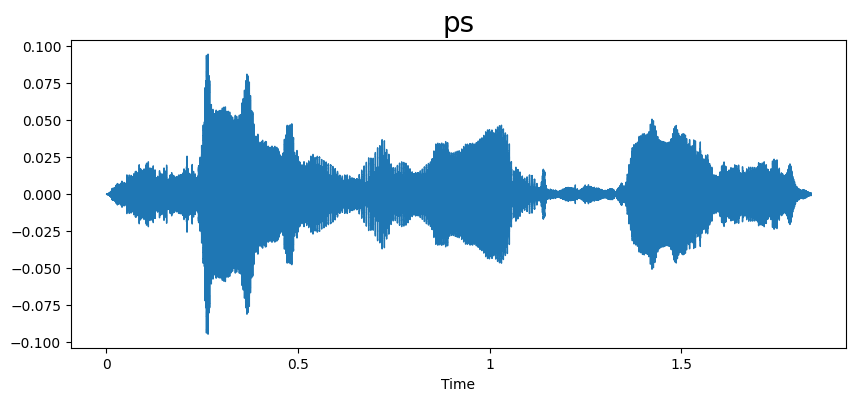

In [51]:
emotion = 'ps'
path = np.array(df['audio'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

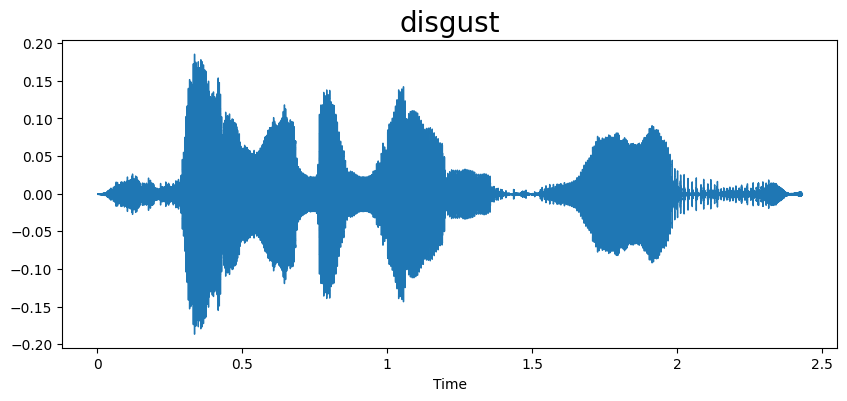

In [52]:
emotion = 'disgust'
path = np.array(df['audio'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

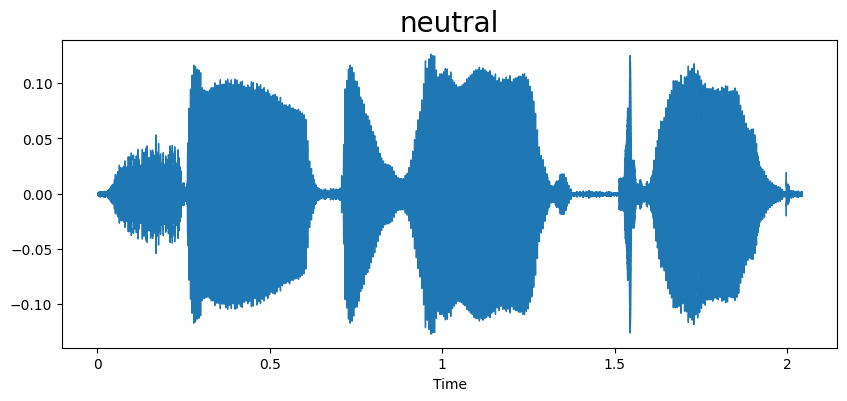

In [53]:
emotion = 'neutral'
path = np.array(df['audio'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

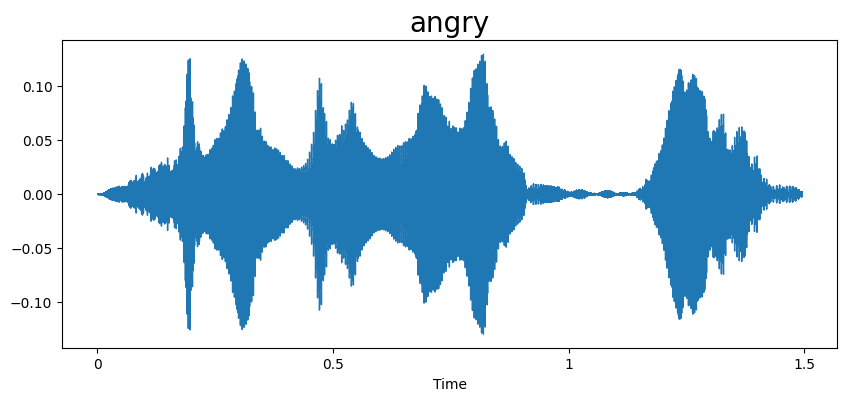

In [54]:
emotion = 'angry'
path = np.array(df['audio'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

**Reshaping input data**

In [20]:
x=np.array(audio_data)
x=x.reshape(x.shape[0],x.shape[1],-1)
print(x.shape)
x

(2800, 40, 1)


array([[[-6.0686064e+00],
        [ 1.1978854e+00],
        [ 2.4319312e-01],
        ...,
        [ 4.4412518e-01],
        [ 2.0500779e-01],
        [ 1.2530433e-01]],

       [[-6.0916553e+00],
        [ 1.0674828e+00],
        [-1.2216551e-03],
        ...,
        [ 6.9134764e-02],
        [ 3.7607502e-02],
        [ 1.7205459e-01]],

       [[-6.0159731e+00],
        [ 1.3181585e+00],
        [-7.1217932e-02],
        ...,
        [ 6.0933739e-01],
        [ 3.8247257e-01],
        [ 1.4860800e-01]],

       ...,

       [[-6.2076173e+00],
        [ 4.9430993e-01],
        [ 1.4138250e-01],
        ...,
        [ 1.8108290e-01],
        [ 1.6625923e-01],
        [ 1.9819646e-01]],

       [[-6.1695266e+00],
        [ 8.6220819e-01],
        [ 9.5514156e-02],
        ...,
        [ 1.7390576e-01],
        [ 1.8491313e-01],
        [ 2.2395808e-01]],

       [[-6.2018986e+00],
        [ 6.7521846e-01],
        [ 2.3538108e-01],
        ...,
        [ 1.9919834e-01],
        [ 1.708

**Encoding the output data(y)**

In [21]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(np.array(transcripts))
# Perform one-hot encoding
y = to_categorical(encoded_labels)
y.shape

(2800, 7)

In [22]:
print(transcripts)
print(encoded_labels)

['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral'

In [23]:
labels=['angry','disguist','fear','happy','neutral','pleasent_surprise','sadness']

**Spliting the data using train_test_split**

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,encod_train,encod_test=train_test_split(x,y,encoded_labels,random_state=2499)

In [25]:
y_train,encod_train

(array([[0., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 0, 0, 1]))

 **Define the Base models**

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
progress=model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

predictions = model.predict(x_test)



Epoch 1/50
27/27 [==============================] - 8s 179ms/step - loss: 1.8731 - accuracy: 0.2464 - val_loss: 1.5519 - val_accuracy: 0.3690
Epoch 2/50
27/27 [==============================] - 8s 283ms/step - loss: 1.3972 - accuracy: 0.4232 - val_loss: 1.1490 - val_accuracy: 0.5262
Epoch 3/50
27/27 [==============================] - 7s 266ms/step - loss: 1.1534 - accuracy: 0.5155 - val_loss: 1.0509 - val_accuracy: 0.5381
Epoch 4/50
27/27 [==============================] - 4s 159ms/step - loss: 0.9688 - accuracy: 0.5935 - val_loss: 0.6309 - val_accuracy: 0.7286
Epoch 5/50
27/27 [==============================] - 6s 221ms/step - loss: 0.8441 - accuracy: 0.6548 - val_loss: 0.9558 - val_accuracy: 0.6333
Epoch 6/50
27/27 [==============================] - 4s 143ms/step - loss: 0.7646 - accuracy: 0.6863 - val_loss: 0.5817 - val_accuracy: 0.7905
Epoch 7/50
27/27 [==============================] - 4s 154ms/step - loss: 0.7185 - accuracy: 0.7339 - val_loss: 0.5306 - val_accuracy: 0.7714
Epoch 

**Model Evaluation**

In [27]:
loss,accuracy=model.evaluate(x_test,y_test)

22/22 [==============================] - 1s 32ms/step - loss: 0.1222 - accuracy: 0.9643


In [28]:
ypred=np.argmax(predictions,axis=1)

**Accuracy of the LSTM model**

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(encod_test,ypred)

0.9642857142857143

**Testing with new audio data**

In [30]:
def test_new_data(test_sam):
  test_sam1=extract_audio_features(test_sam)
  test_sam1=np.array(test_sam1)
  test_sam1=test_sam1.reshape(1,40,-1)
  test_sam1.shape
  output=model.predict(test_sam1)
  print(labels[np.argmax(output)])



In [31]:
test_new_data('/content/dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_back_disgust.wav')

1/1 [==============================] - 0s 38ms/step
disguist


In [32]:
test_new_data('/content/dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_back_ps.wav')

1/1 [==============================] - 0s 39ms/step
pleasent_surprise


In [33]:
test_new_data('/content/drive/MyDrive/speech_data/1001_DFA_SAD_XX.wav')

1/1 [==============================] - 0s 41ms/step
sadness


**Classification Report of the Model**

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(encod_test,ypred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.97      0.94      0.95        93
           2       0.98      0.99      0.98        95
           3       0.92      0.95      0.93        92
           4       1.00      1.00      1.00       109
           5       0.94      0.93      0.94       101
           6       0.96      0.97      0.97       109

    accuracy                           0.96       700
   macro avg       0.96      0.96      0.96       700
weighted avg       0.96      0.96      0.96       700



**Evaluating the model using plots**

In [36]:
import matplotlib.pyplot as plt

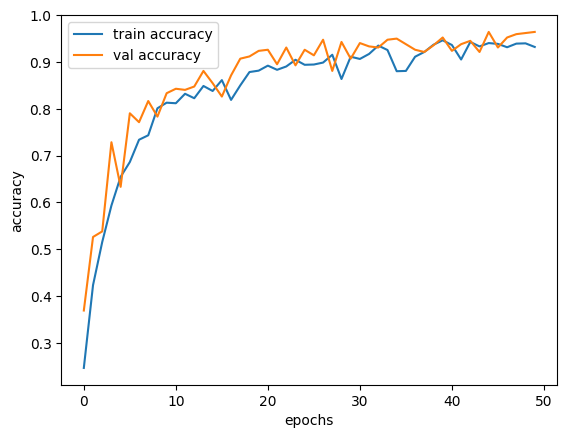

In [37]:
epochs = list(range(50))
acc = progress.history['accuracy']
val_acc = progress.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

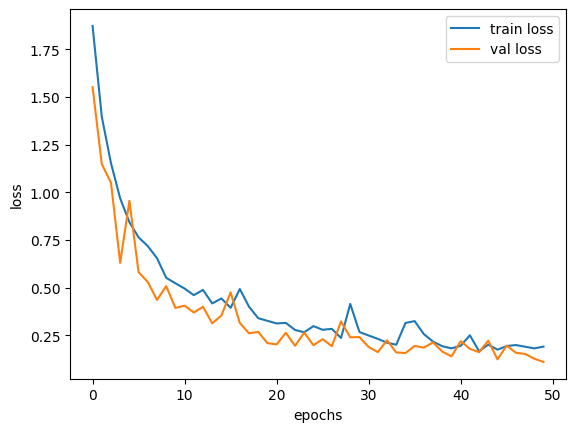

In [38]:
epochs = list(range(50))
loss = progress.history['loss']
val_loss = progress.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()